# Train YOLOV5 on your custom dataset
1. 准备
2. 图像(image)，像素(pixel)，坐标（coordinate），检测框（boundary box, bbox)
3. YOLOv5 数据格式
4. YOLOv5 配置与训练

## 准备

- clone [YOLOv5 repo](https://github.com/ultralytics/yolov5)到本地，下载模型权重
- [下载数据](https://www.kaggle.com/competitions/tensorflow-great-barrier-reef/data)

In [1]:
!ls

1_train_yolov5_on_your_custum_dataset.ipynb  input	  utils.py
2_predict_and_evaluate.ipynb		     __pycache__  weight
3_track.ipynb				     README.md	  yolov5


## 图像(image)，像素(pixel)，坐标（coordinate），检测框（boundary box, bbox)

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
def load_image(image_path):
    img = cv2.imread(image_path) # GBR format, numpy array
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # RGB format
    return img

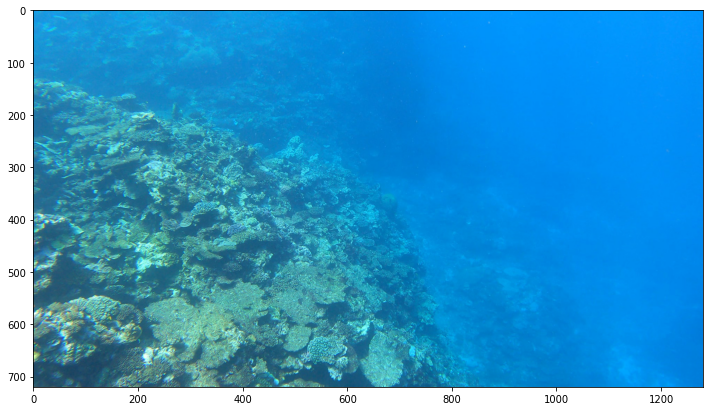

In [4]:
plt.figure(figsize=(12, 12))
image = load_image("./input/tensorflow-great-barrier-reef/train_images/video_0/1109.jpg")
plt.imshow(image)

In [5]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(720, 1280, 3)


In [6]:
train = pd.read_csv("./input/tensorflow-great-barrier-reef/train.csv")
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]


In [7]:
train[train.annotations != "[]"].head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]"
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]"
18,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]"
19,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]"
20,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]"


In [8]:
train['bbox'] = train['annotations'].apply(lambda annos: [[a['x'], a['y'], a['width'], a['height']] for a in eval(annos)])
train[train.annotations != "[]"].head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,bbox
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]","[[559, 213, 50, 32]]"
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]","[[558, 213, 50, 32]]"
18,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]","[[557, 213, 50, 32]]"
19,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]","[[556, 214, 50, 32]]"
20,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]","[[555, 214, 50, 32]]"


In [9]:
train = train.drop(train[train.bbox.apply(len) == 0].index).reset_index(drop=True)
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,bbox
0,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]","[[559, 213, 50, 32]]"
1,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]","[[558, 213, 50, 32]]"
2,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]","[[557, 213, 50, 32]]"
3,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]","[[556, 214, 50, 32]]"
4,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]","[[555, 214, 50, 32]]"


In [10]:
train['org_image_path'] = f"./input/tensorflow-great-barrier-reef/train_images/video_" + \
                          train['video_id'].astype(str) + \
                          "/" + train['video_frame'].astype(str) + ".jpg"

In [11]:
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,bbox,org_image_path
0,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]","[[559, 213, 50, 32]]",./input/tensorflow-great-barrier-reef/train_im...
1,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]","[[558, 213, 50, 32]]",./input/tensorflow-great-barrier-reef/train_im...
2,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]","[[557, 213, 50, 32]]",./input/tensorflow-great-barrier-reef/train_im...
3,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]","[[556, 214, 50, 32]]",./input/tensorflow-great-barrier-reef/train_im...
4,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]","[[555, 214, 50, 32]]",./input/tensorflow-great-barrier-reef/train_im...


In [12]:
# 选取video 0 frame 16
image_path = train.loc[(train.video_id == 0) & (train.video_frame == 16)].org_image_path[0]
bbox = train.loc[(train.video_id == 0) & (train.video_frame == 16)].bbox[0]

In [13]:
print(image_path)
print(bbox)

./input/tensorflow-great-barrier-reef/train_images/video_0/16.jpg
[[559, 213, 50, 32]]


In [14]:
# coco format [[559, 213, 50, 32]] -> voc format -> visualization
# [[559, 213, 50, 32]] -> [[559, 213, 609, 245]] 

In [15]:
from utils import plot_one_box, coco2yolo

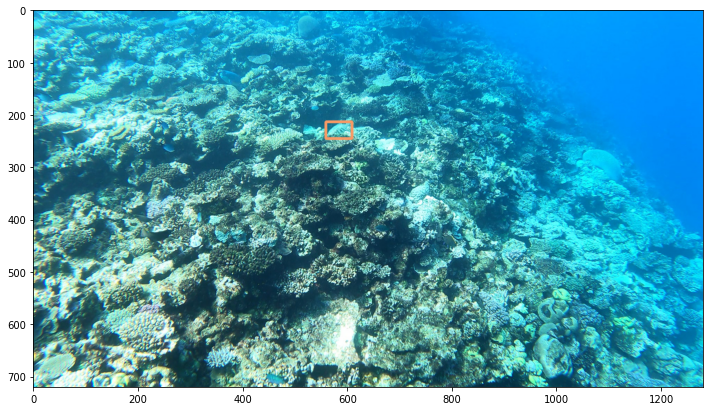

In [16]:
image = load_image(image_path)
plot_one_box([559, 213, 609, 245], image)

plt.figure(figsize=(12, 12))
plt.imshow(image)

In [17]:
train['bbox'] = train['bbox'].apply(lambda bboxes: [coco2yolo(np.array(b).astype(float)) for b in bboxes])

## YOLOv5 数据格式

```text

images/train/{put your train images, trn_1.jpg ...}
images/valid/{put your valid images, val_1.jpg ...}
labels/train/{put your train labels, trn_1.txt ...}
labels/valid/{put your valid labels, val_1.txt ...}


labels format, cls xmid ymid w h

```

In [18]:
!ls input/

process  tensorflow-great-barrier-reef


In [19]:
from pathlib import Path

train_image_dir = Path("./input/process/images/train")
valid_image_dir = Path("./input/process/images/valid")
train_labels_dir = Path("./input/process/labels/train")
valid_labels_dir = Path("./input/process/labels/valid")

train_image_dir.mkdir(parents=True, exist_ok=True)
valid_image_dir.mkdir(parents=True, exist_ok=True)
train_labels_dir.mkdir(parents=True, exist_ok=True)
valid_labels_dir.mkdir(parents=True, exist_ok=True)

In [30]:
!ls input/

process  tensorflow-great-barrier-reef


In [31]:
import shutil
from joblib import delayed, parallel

In [32]:
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,bbox,org_image_path,fold
0,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]","[[0.45625, 0.31805555555555554, 0.0390625, 0.0...",./input/tensorflow-great-barrier-reef/train_im...,train
1,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]","[[0.45546875, 0.31805555555555554, 0.0390625, ...",./input/tensorflow-great-barrier-reef/train_im...,train
2,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]","[[0.4546875, 0.31805555555555554, 0.0390625, 0...",./input/tensorflow-great-barrier-reef/train_im...,train
3,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]","[[0.45390625, 0.3194444444444444, 0.0390625, 0...",./input/tensorflow-great-barrier-reef/train_im...,train
4,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]","[[0.453125, 0.3194444444444444, 0.0390625, 0.0...",./input/tensorflow-great-barrier-reef/train_im...,train


In [34]:
train.loc[train.video_id.isin([0, 1]), 'fold'] = 'train'
train.loc[train.video_id.isin([2]), 'fold'] = 'valid'

In [39]:
def annot2str(data):
    """Generate string from annotation.
    
    Args:
        data (np.ndarray): annotation in array format.
    
    Returns:
        str: annotation in string format.
    """
    data   = data.astype(str)
    string = '\n'.join([' '.join(annot) for annot in data])
    return string


In [41]:
from tqdm import tqdm

for i, row in tqdm(train.iterrows()):
    fold = row.fold
    bbox = row.bbox
    org_path = row.org_image_path
    image_id = row.image_id
    
    shutil.copy(org_path, train_image_dir / f"{image_id}.jpg" if fold == 'train' else valid_image_dir / f"{image_id}.jpg")
    with open(train_labels_dir / f"{image_id}.txt" if fold == 'train' else valid_labels_dir / f"{image_id}.txt", 'w') as f:
        labels = np.array([0] * len(bbox))[:, None].astype(str)
        bbox = np.array(bbox).astype(str)
        info = np.concatenate([labels, bbox], axis=1)
        info = annot2str(info)
        f.write(info)

4919it [00:02, 1771.09it/s]


## 配置与训练

In [51]:
%%writefile data.yaml

path: /home/kky/project/yolov5-toturial/input/process
train: images/train
val: images/valid
test: null

nc: 1
names: ['cots']

Overwriting data.yaml


In [44]:
%%writefile v5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

Writing v5s.yaml


In [45]:
%%writefile hyp.yaml

# YOLOv5 Hyperparameter Evolution Results
# Best generation: 287
# Last generation: 300
#    metrics/precision,       metrics/recall,      metrics/mAP_0.5, metrics/mAP_0.5:0.95,         val/box_loss,         val/obj_loss,         val/cls_loss
#              0.54634,              0.55625,              0.58201,              0.33665,             0.056451,             0.042892,             0.013441

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.2  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.5  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.0  # image mixup (probability)
copy_paste: 0.0  # segment copy-paste (probability)

Writing hyp.yaml


In [48]:
image_size = 1280
batch_size = 4
epochs = 5
data = "./data.yaml"
hyp = "./hyp.yaml"
model_config = "./v5s.yaml"
weight = "./weight/yolov5s.pt"

In [49]:
import os

In [52]:
os.system(f"python ./yolov5/train.py --img {image_size} --batch {batch_size} --epochs {epochs} --data {data} --weights {weight} --hyp {hyp} --cfg {model_config}")

wandb: Currently logged in as: kk (use `wandb login --relogin` to force relogin)
train: weights=./weight/yolov5s.pt, cfg=./v5s.yaml, data=./data.yaml, hyp=./hyp.yaml, epochs=5, batch_size=4, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-193-g15b7565 Python-3.8.2 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_moment

        3/4      2.24G    0.04558    0.02941          0          8       1280: 100% 1061/1061 [02:13<00:00,  7.95it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 85/85 [00:08<00:00, 10.45it/s]
                   all        677       2449      0.859      0.657      0.741      0.346

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
        4/4      2.24G    0.04241    0.02601          0         10       1280: 100% 1061/1061 [02:12<00:00,  8.01it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 85/85 [00:08<00:00,  9.99it/s]
                   all        677       2449      0.836      0.675      0.755      0.367

5 epochs completed in 0.208 hours.
Optimizer stripped from yolov5/runs/train/exp2/weights/last.pt, 14.7MB
Optimizer stripped from yolov5/runs/train/exp2/weights/best.pt, 14.7MB

Validating yolov5/runs/train/exp2/weights/best.pt...
Fusing layers... 
v5s

0